In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [2]:

# Load the IMDB dataset
# num_words=10000 means we only keep the top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Explore the data
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 25000, Testing samples: 25000


In [4]:

# Pad sequences so they are all the same length
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=256)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=256)

In [5]:

# Build the deep neural network model
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=256),  # Converts word indices into dense vectors
    layers.GlobalAveragePooling1D(),  # Reduces each feature map to a single number
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5419 - loss: 0.6919 - val_accuracy: 0.5888 - val_loss: 0.6843
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6627 - loss: 0.6796 - val_accuracy: 0.7386 - val_loss: 0.6578
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7428 - loss: 0.6490 - val_accuracy: 0.7708 - val_loss: 0.6125
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7758 - loss: 0.6001 - val_accuracy: 0.7996 - val_loss: 0.5525
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8205 - loss: 0.5337 - val_accuracy: 0.8216 - val_loss: 0.4927
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8370 - loss: 0.4727 - val_accuracy: 0.8380 - val_loss: 0.4439
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8541 - loss: 0.4223 - val_accuracy: 0.8468 - val_loss: 0.4044
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8616 - loss: 0.3804 - val_accuracy: 0.8462 - v

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8584 - loss: 0.3448

Test Accuracy: 0.86


In [8]:
# Make predictions
predictions = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [11]:
# Show example predictions
for i in range(5):
    print(f"Review {i+1}: {'Positive' if predictions[i] > 0.5 else 'Negative'} (Actual: {'Positive' if y_test[i] else 'Negative'})")

Review 1: Negative (Actual: Negative)
Review 2: Positive (Actual: Positive)
Review 3: Negative (Actual: Positive)
Review 4: Positive (Actual: Negative)
Review 5: Positive (Actual: Positive)


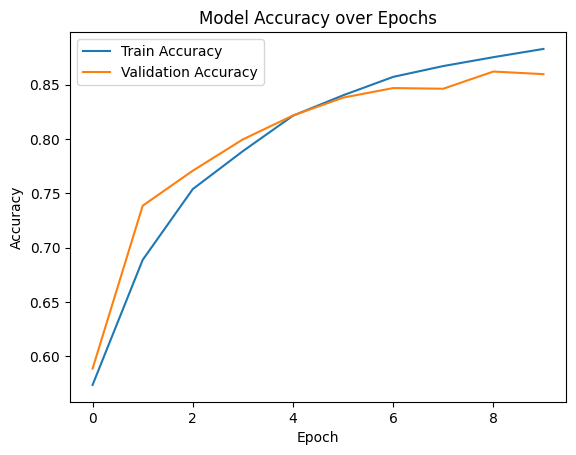

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
